In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/animals.csv", sep=',')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [3]:
body = df['body'].values
brain = df['brain'].values
names = df['name'].values
N = len(body)

In [4]:
body_log = np.log(body)
brain_log = np.log(brain)

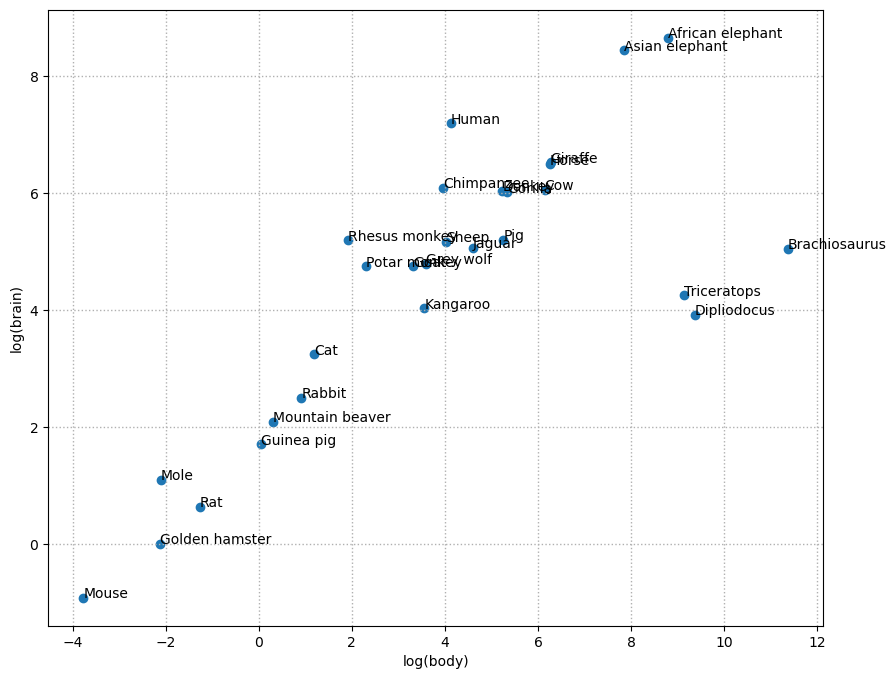

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(body_log, brain_log)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')

for name, x, y in zip(names, body_log, brain_log):
    plt.text(x, y, name)

plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [7]:
import mltools.estimators as estimators
import mltools.funcs as funcs
import mltools.scores as scores

$$
|x|_\varepsilon = \sqrt{\varepsilon^2 + x^2} - \varepsilon
$$

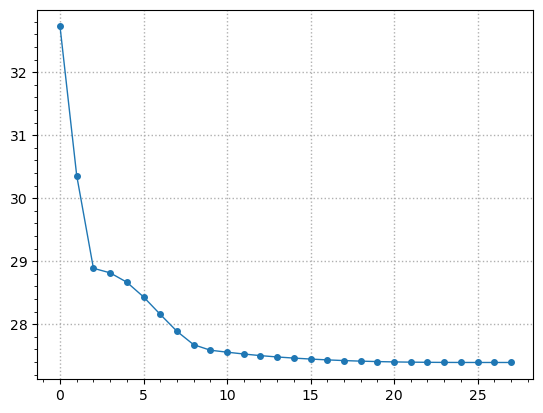

In [8]:
irls = estimators.IRLS(funcs.SoftAbs(0.001))
irls.fit(body_log[:,None], brain_log)

# print(irls.qvals)
plt.plot(irls.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [9]:
brain_log_p = irls.model.evaluate(body_log[:,None])

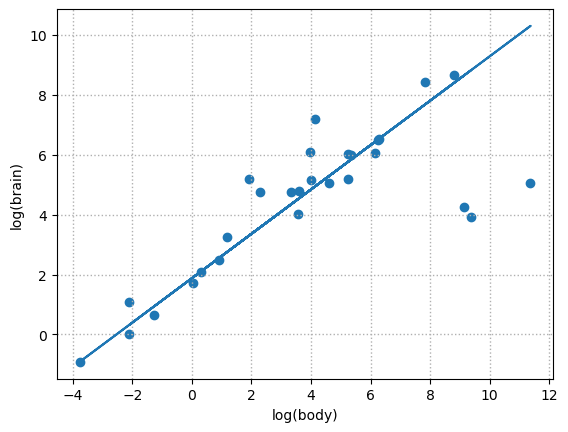

In [10]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, brain_log_p)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [11]:
err = np.abs(brain_log - brain_log_p)
zerr = scores.modified_zscore(err)

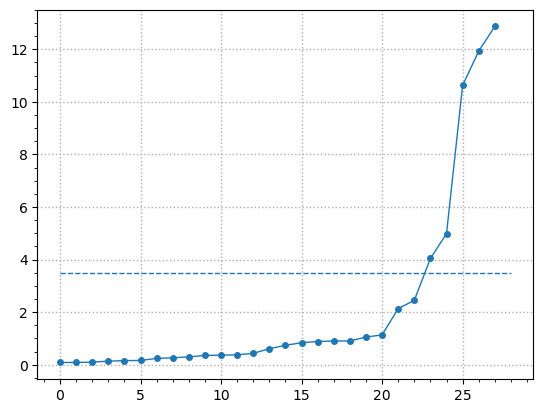

In [12]:
plt.plot(sorted(abs(zerr)), marker='o', markersize=4, linewidth=1.0)
plt.hlines(3.5, 0, N, linewidth=1.0, linestyle='--')
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [13]:
brain_log1 = brain_log[abs(zerr) < 3.5]
body_log1 = body_log[abs(zerr) < 3.5]

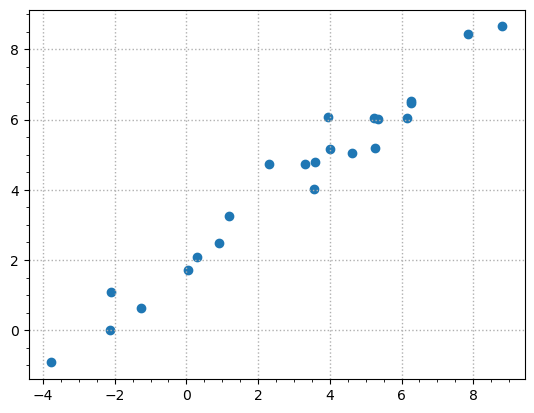

In [14]:
plt.scatter(body_log1, brain_log1)
plt.grid(1, linewidth=1.0, linestyle=":")
plt.minorticks_on()
plt.show()

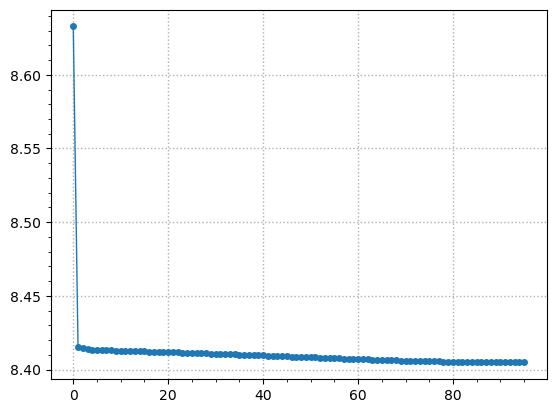

In [16]:
irls1 = estimators.IRLS(funcs.SoftAbs(0.001))
irls1.fit(body_log1[:,None], brain_log1)

# print(irls1.qvals)
plt.plot(irls1.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [17]:
err1 = np.abs(brain_log - irls1.model.evaluate(body_log[:,None]))
zerr1 = scores.modified_zscore(err1)

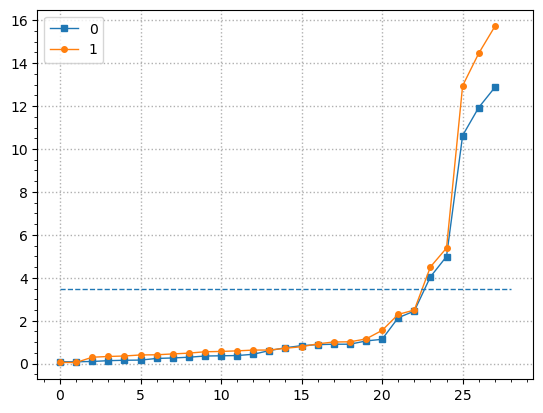

In [18]:
plt.plot(sorted(abs(zerr)), marker='s', markersize=4, linewidth=1.0, label='0')
plt.plot(sorted(abs(zerr1)), marker='o', markersize=4, linewidth=1.0, label='1')
plt.hlines(3.5, 0, N, linewidth=1.0, linestyle='--')
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.legend()
plt.show()

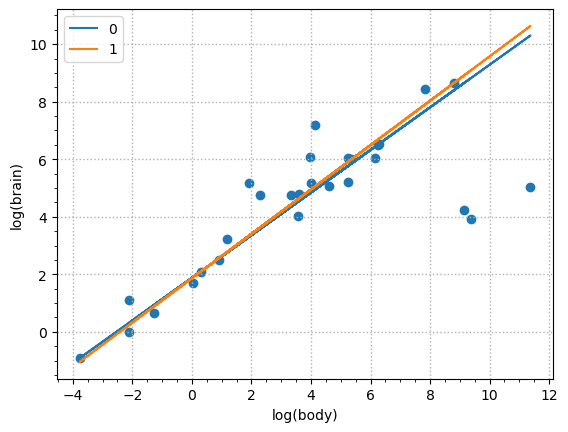

In [17]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, irls.model.evaluate(body_log[:,None]), label='0')
plt.plot(body_log, irls1.model.evaluate(body_log[:,None]), label='1')
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.minorticks_on()
plt.legend()
plt.show()

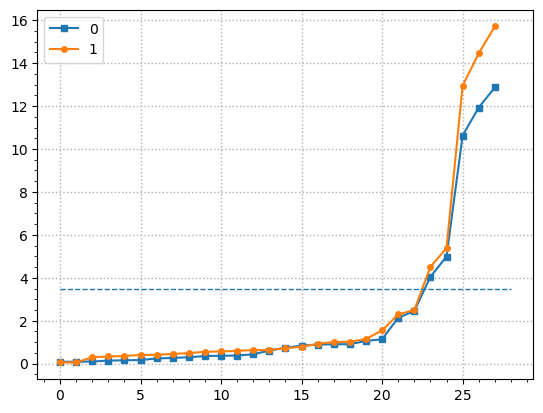

In [18]:
plt.plot(sorted(abs(zerr)), marker='s', markersize=4, label='0')
err2 = np.abs(brain_log - irls1.model.evaluate(body_log[:,None]))
zerr2 = scores.modified_zscore(err1)
plt.plot(sorted(abs(zerr1)), marker='o', markersize=4, label='1')
plt.hlines(3.5, 0, N, linewidth=1.0, linestyle='--')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.minorticks_on()
plt.legend()
plt.show()

In [19]:
est2 = estimators.LinearLS()
est2.fit(body_log1[:,None], brain_log1)

In [20]:
err2 = np.abs(brain_log - est2.model.evaluate(body_log[:,None]))
zerr2 = scores.modified_zscore(err2)

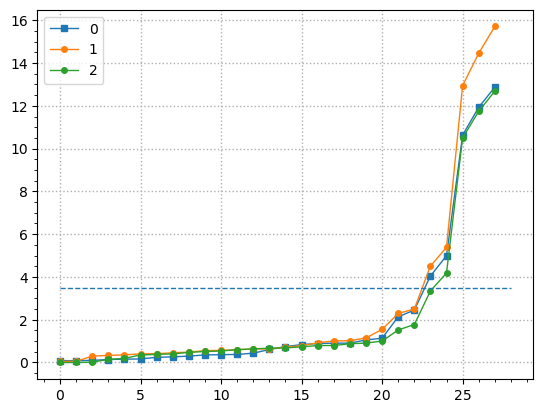

In [21]:
plt.plot(sorted(abs(zerr)), marker='s', markersize=4, linewidth=1.0, label='0')
plt.plot(sorted(abs(zerr1)), marker='o', markersize=4, linewidth=1.0, label='1')
plt.plot(sorted(abs(zerr2)), marker='o', markersize=4, linewidth=1.0, label='2')
plt.hlines(3.5, 0, N, linewidth=1.0, linestyle='--')
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.legend()
plt.show()

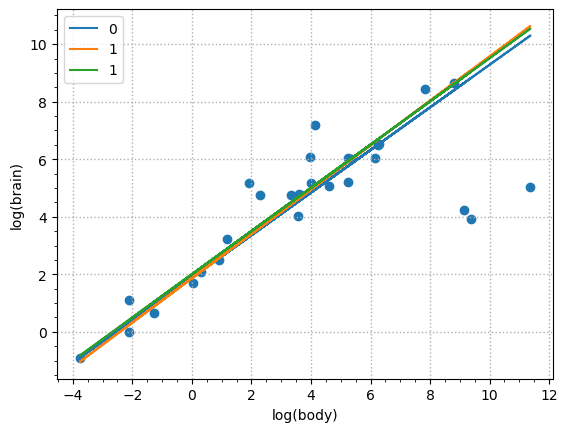

In [22]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, irls.model.evaluate(body_log[:,None]), label='0')
plt.plot(body_log, irls1.model.evaluate(body_log[:,None]), label='1')
plt.plot(body_log, est2.model.evaluate(body_log[:,None]), label='1')
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.minorticks_on()
plt.legend()
plt.show()